In [14]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, LassoCV, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel, WhiteKernel, \
RationalQuadratic, ExpSineSquared, DotProduct
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from  xgboost import XGBRegressor
from sklearn.inspection import permutation_importance

In [2]:
data = pd.read_csv('datasets/elem+hard_feat_all.csv') ## original dataset

In [3]:
data

,Compound,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,max_eta_anion,mean_eta_anion,std-dev_eta_anion,min_diff_eta,max_diff_eta,mean_diff_eta,std-dev_diff_eta,mean_eta_both,geom-mean_eta_both,Formation_energy
0,OH-OH-Ba,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,56,55,...,5.6,5.6,0.0,7.2,7.2,7.2,0.0,8.000000,7.376698,-1.865620
1,OH-OH-Be,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,8,7,...,5.6,5.6,0.0,62.2,62.2,62.2,0.0,26.333333,12.858844,-1.597309
2,OH-OH-Ca,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,20,19,...,5.6,5.6,0.0,14.1,14.1,14.1,0.0,10.300000,8.516885,-2.011544
3,OH-OH-Cd,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,48,47,...,5.6,5.6,0.0,4.7,4.7,4.7,0.0,7.166667,6.861269,-1.114656
4,OH-OH-Co,3,0.60000,0.514256,0.460906,0.441882,0.428730,1,27,26,...,5.6,5.6,0.0,2.6,2.6,2.6,0.0,6.466667,6.359114,-0.993519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3094,Se-Te-Sn,3,0.57735,0.480750,0.415244,0.389977,0.372041,34,52,18,...,6.4,4.6,1.8,11.9,15.5,13.7,1.8,9.166667,6.895986,-0.223685
3095,Se-Te-Tc,3,0.57735,0.480750,0.415244,0.389977,0.372041,34,52,18,...,6.4,4.6,1.8,6.4,10.0,8.2,1.8,7.333333,6.121380,-0.173823
3096,Se-Te-Ti,3,0.57735,0.480750,0.415244,0.389977,0.372041,22,52,30,...,6.4,4.6,1.8,21.6,25.2,23.4,1.8,12.400000,7.946307,-1.068113
3097,Se-Te-W,3,0.57735,0.480750,0.415244,0.389977,0.372041,34,74,40,...,6.4,4.6,1.8,-0.9,2.7,0.9,1.8,4.900000,4.619201,-0.090886


In [9]:
X = data.iloc[:,1:-1]
Y = data.iloc[:,-1]
colnames = X.columns

In [6]:
# Define a dictionary to store the feature rankings from individual ML algorithms
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

## Ranking with different ML algorithms

In [16]:
## Linear Regression
# print("---Linear Regression---")
# lr = LinearRegression()
# lr.fit(X_f, Y)
# ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

## Ridge Regression
print("---Ridge Regression---")
ridge = Ridge()
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

## Lasso
print("---Lasso---")
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

## Random Forest
# print("---Random Forest---")
# rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
# rf.fit(X_f,Y)
# ranks["RF"] = ranking(rf.feature_importances_, colnames)

## SVR
# print("---Support Vector---")
# svr = SVR(kernel='linear')
# svr.fit(X_f, Y)
# ranks["SVR"] = ranking(np.abs(svr.coef_), colnames)

## KRR
# print("---Kernel Ridge---")
# krr = KernelRidge()
# krr.fit(X_f, Y)
# ranks["KRR"] = ranking(np.abs(krr.dual_coef_), colnames)

## RFE
print("---RFE---")
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=3)
rfe.fit(X, Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
print(rfe.ranking_)

## Permutation Feature Importance -- a wrapper method
print("---PI---")
model = SVR(kernel='linear')
model.fit(X, Y)
pi = permutation_importance(model, X, Y, scoring='neg_mean_squared_error')
ranks["PI"] = ranking(pi.importances_mean, colnames)

## XGBoost
print("---XGBoost---")
xg = XGBRegressor(n_estimators=100, learning_rate=0.1)
xg.fit(X,Y)
ranks["XGB"] = ranking(xg.feature_importances_, colnames)

---Ridge Regression---
---Lasso---
---RFE---
[ 33 110  93  48 139 122 114  71  45  62  42 138  70  56   1   9  24  26
 126  75  69  27  57  99 124  74  31   4  12 123 105 120  55  85  20  94
 129  89  60  77  79 140 127  38  80  54  50 118  18 137  44  11   6  68
 146 152 143 101 103  64 145 131 135 115   8 116 142  96  95  81  61 150
 153 106 134 102 100 159 109  32  73  49  59  58 157 133 128  67  47 144
 156  86 121  90  37 132 154  84  92  83 113 151 147 112 148 136 141 160
 108  87  91  25   3 125 130  72  63  28  16  98 155 107 104   7  30 111
 149  97 117 119  78 158  36  40  76   1  19  88  66  53  52  22  21  10
  17  29  65   1  82   2  46  15  35  23  13  14  51  43   5  41  34  39]
---PI---
---XGBoost---


## Mean of the feature ranking

In [17]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")

## Put all the scores into a Pandas dataframe
m1 = []; m2 = []; m3 = []; m4 = []; m5 = []                               ## change according to no of methods used
m6 = []
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))
    m1.append(ranks[methods[0]][name])
    m2.append(ranks[methods[1]][name])
    m3.append(ranks[methods[2]][name])
    m4.append(ranks[methods[3]][name])
    m5.append(ranks[methods[4]][name])
    m6.append(ranks[methods[5]][name])
    # m7.append(ranks[methods[6]][name])

dict = {'Feature': colnames, methods[0]: m1, methods[1]: m2,
        methods[2]: m3, methods[3]: m4, methods[4]: m5,
        methods[5]: m6}
df = pd.DataFrame(dict, columns=['Feature', methods[0], methods[1],
        methods[2], methods[3], methods[4], methods[5]])
df = df.sort_values(methods[5], ascending=False)

	Lasso	PI	RFE	Ridge	XGB	Mean
0-norm	0.0	0.0	0.8	0.07	0.0	0.17
2-norm	0.0	0.0	0.31	0.06	0.0	0.07
3-norm	0.0	0.0	0.42	0.08	0.0	0.1
5-norm	0.0	0.0	0.7	0.07	0.0	0.15
7-norm	0.0	0.0	0.13	0.06	0.01	0.04
10-norm	0.0	0.0	0.24	0.03	0.0	0.05
MagpieData minimum Number	0.0	0.0	0.29	0.04	0.0	0.07
MagpieData maximum Number	0.0	0.0	0.56	0.03	0.0	0.12
MagpieData range Number	0.0	0.0	0.72	0.0	0.0	0.14
MagpieData mean Number	0.0	0.0	0.62	0.35	0.0	0.19
MagpieData avg_dev Number	0.0	0.0	0.74	0.05	0.0	0.16
MagpieData mode Number	0.0	0.0	0.14	0.07	0.01	0.04
MagpieData minimum MendeleevNumber	0.16	0.0	0.57	0.0	0.05	0.16
MagpieData maximum MendeleevNumber	0.16	0.0	0.65	0.02	0.01	0.17
MagpieData range MendeleevNumber	0.0	0.0	1.0	0.03	0.13	0.23
MagpieData mean MendeleevNumber	0.0	0.0	0.95	0.11	0.0	0.21
MagpieData avg_dev MendeleevNumber	0.58	0.0	0.86	0.17	0.04	0.33
MagpieData mode MendeleevNumber	0.0	0.0	0.84	0.0	0.01	0.17
MagpieData minimum AtomicWeight	0.0	0.01	0.21	0.01	0.0	0.05
MagpieData maximum AtomicWeig

## Plotting feature correlation and mean feature ranking plots

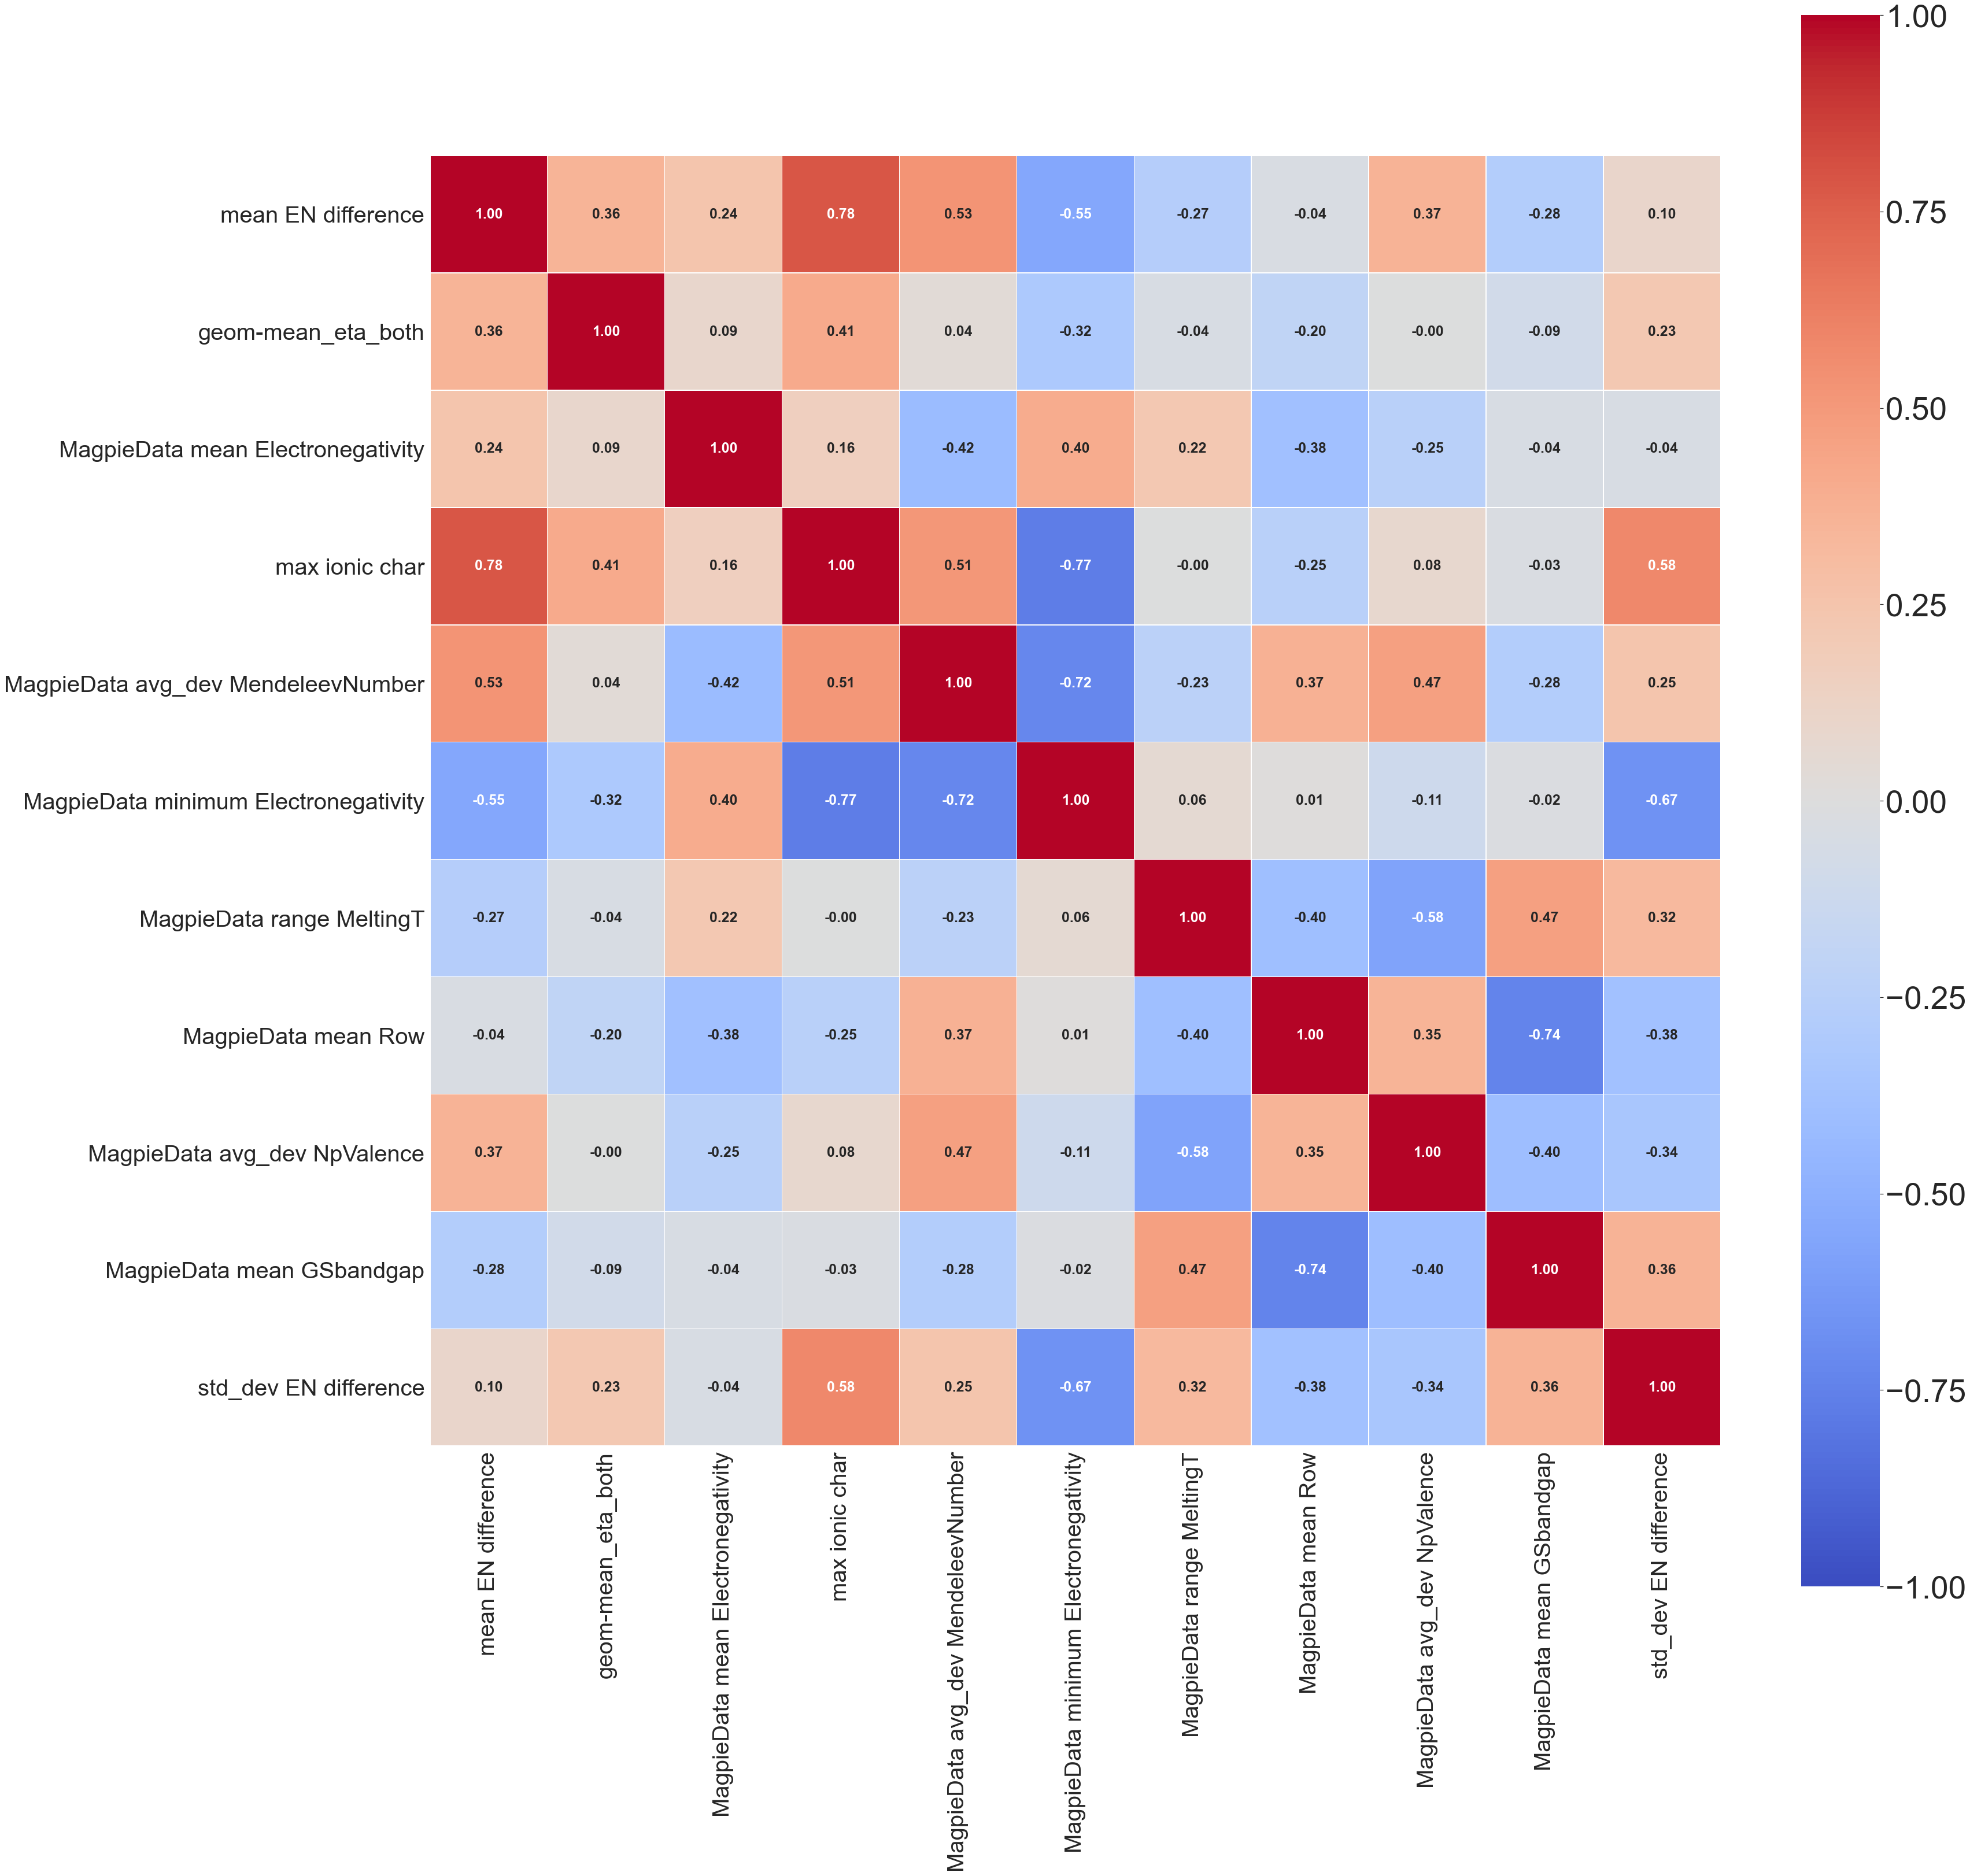

In [24]:
# df.to_csv('datasets/ranking_elem+hard-feat.csv', index=False)                    ## output the ranked features to a file
df = pd.read_csv('datasets/ranking_elem+hard-feat.csv')
df_ = df[:15]

sel_feat = df_['Feature']
la = X.loc[:,sel_feat]
X_f = pd.DataFrame(la)

## ============================================================================
#      Remove highly correlated features (only after checking correlation)
## ============================================================================
rem = ['avg ionic char', 'MagpieData avg_dev MeltingT', 'MagpieData mean SpaceGroupNumber', 'MagpieData maximum MeltingT'] # highly correlated features; to be removed
rem_no = [6, 12, 13, 14] ## check the correspnding row numbers from the 'ranking_elem+hard-feat.csv' file
for col in rem:
    if col in X_f.columns:
        del X_f[col]
df_.drop(rem_no, inplace=True)

## ============================================================================
#                     Correlation plot
## ============================================================================
corr = X_f.corr()
fig = plt.subplots(figsize=(50,50))
# sns.set(font_scale=5)
with sns.axes_style("white"):
    ax = sns.heatmap(corr, vmax=1, vmin=-1, fmt=".2f", linewidths=.5, square=True, \
                      annot=True, cmap='coolwarm', annot_kws={"size": 25, "weight": 'bold'})
sns.color_palette('bright')                                            # choose from colorblind, bright or muted
ax.set_xticklabels(df_['Feature'], fontsize=40)
ax.set_yticklabels(df_['Feature'], fontsize=40)
plt.show()
# plt.savefig('corr_ranked-feat.png', dpi=300)

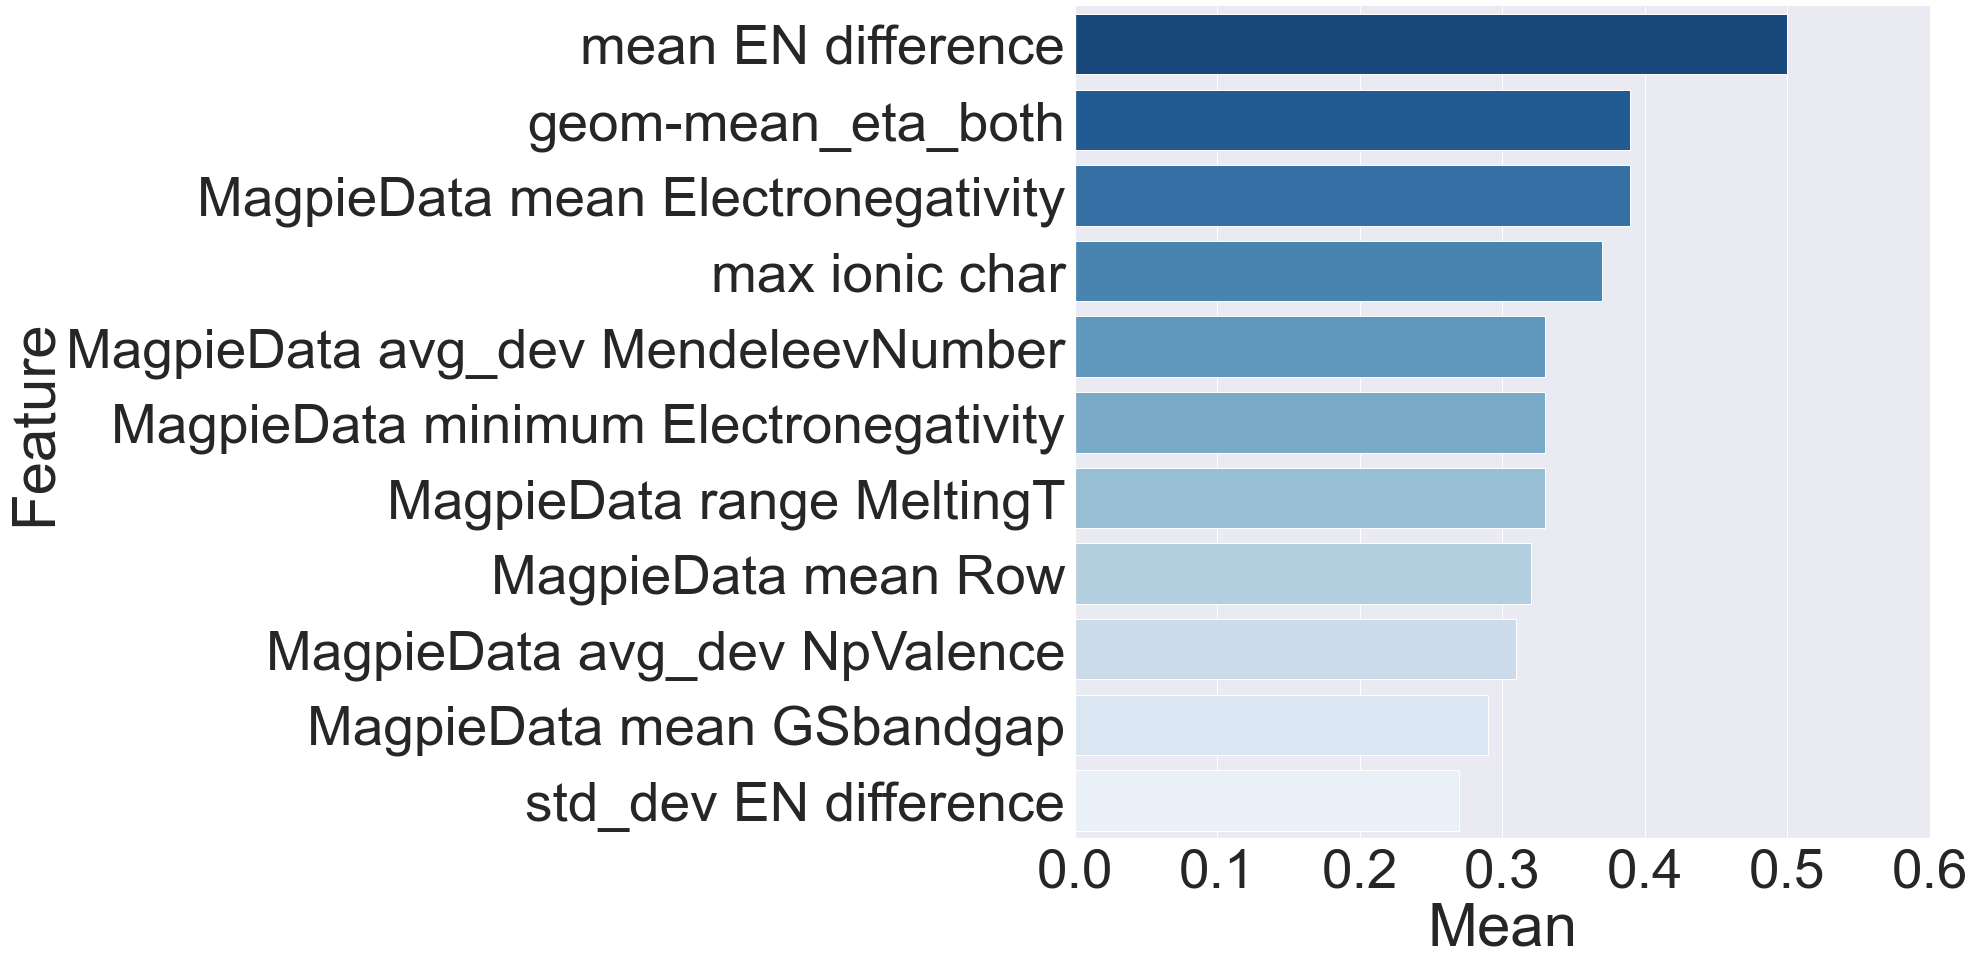

In [25]:
# =============================================================================
#                  Feature ranking plot 
# =============================================================================       
h = sns.catplot(x="Mean", y="Feature", data = df_, kind="bar", 
                height=15, aspect=1.9, palette='Blues_r')
h.ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6])
sns.color_palette('bright')                                          # choose from colorblind, bright or muted
plt.show()
# plt.savefig('feat-score_ranked.png', dpi=300)

In [28]:
# =============================================================================
#        Exporting the final dataset (to be utilized in rest of ML studies)
# =============================================================================

df_final = pd.concat([data['Compound'], X_f, Y], axis=1)
df_final.to_csv('datasets/final_elem+hard-feat_data.csv', index=False)